In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


<h1> hypothesis and cost function </h1>
- 1차 방정식
$H(x) = Wx + b$
- 임의로 표현한 1차방정식과 실제 값과의 차이를 구하는 식 (제곱 하면 음수도 양수 표현 가능)
$(H(x) - y)^2$<br>
- formal하게 바꾼 수식
$ cost(W,b) = {1 \over m}\sum_{i=1}^m(H(x^{(i)}) - y^{(i)})^2 $
    * m = 데이터 개수<br>
- 결론 minimize cost(W,b) -> 학습을 통해 W, b의 최소화 값(가장 근접한 값) 구하는 것


In [0]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

print('node1:', node1, "node2:", node2)
print("node3:", node3)

print('sess.run(node1, node2): ', sess.run([node1, node2]))
print('sess.run(node3): ', sess.run(node3))

a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

print(sess.run(adder_node, feed_dict={a:3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))

node1: Tensor("Const_13:0", shape=(), dtype=float32) node2: Tensor("Const_14:0", shape=(), dtype=float32)
node3: Tensor("Add_15:0", shape=(), dtype=float32)
sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0
7.5
[3. 7.]


In [0]:
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# H(x) = Wx + b
hypothesis = x_train * W + b

# cost/loss function
# t = [1., 2., 3., 4.]
# tf.reduce_mean(t) ==> 2.5
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

'''
adder_node = a + b
print(sess.run(adder_node, feed_dict={a:3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))
'''

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

for step in range(2001):
  cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict={X:[1,2,3], Y:[1,2,3]})
  if step % 20 == 0:
    print(step, cost_val, W_val, b_val)

'''
# Fit the line
for step in range(2001):
  sess.run(train)
  if step % 20 == 0:
    print(step, sess.run(cost), sess.run(W), sess.run(b))
'''

0 4.9856014 [0.01783126] [0.14645904]
20 0.07565526 [0.7235749] [0.42972872]
40 0.028343134 [0.7993711] [0.4371612]
60 0.025375687 [0.81478024] [0.419247]
80 0.023043295 [0.82405436] [0.39979443]
100 0.020928249 [0.8323773] [0.38102943]
120 0.01900737 [0.84026015] [0.36312476]
140 0.017262803 [0.8477678] [0.3460594]
160 0.01567834 [0.8549222] [0.3297959]
180 0.014239346 [0.86174035] [0.3142967]
200 0.01293238 [0.86823803] [0.29952592]
220 0.011745408 [0.87443036] [0.2854493]
240 0.010667349 [0.8803317] [0.2720342]
260 0.009688272 [0.8859557] [0.2592496]
280 0.00879903 [0.8913154] [0.24706578]
300 0.007991419 [0.89642316] [0.23545457]
320 0.007257938 [0.9012909] [0.22438909]
340 0.0065917806 [0.9059298] [0.21384363]
360 0.0059867557 [0.9103508] [0.20379378]
380 0.0054372703 [0.91456395] [0.19421622]
400 0.004938217 [0.9185793] [0.18508875]
420 0.0044849645 [0.9224057] [0.17639019]
440 0.004073314 [0.92605233] [0.1681005]
460 0.0036994468 [0.92952764] [0.16020037]
480 0.0033598973 [0.932

'\n# Fit the line\nfor step in range(2001):\n  sess.run(train)\n  if step % 20 == 0:\n    print(step, sess.run(cost), sess.run(W), sess.run(b))\n'

In [0]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

hypothesis = X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
  cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
    feed_dict={X:[1,2,3,4,5], Y:[2.1, 3.1, 4.1, 5.1, 6.1]})
  if step % 20 == 0:
    print(step, cost_val, W_val, b_val)

0 83.96294 [-0.44505155] [-1.2734768]
20 0.5391868 [1.4655435] [-0.61504465]
40 0.46939096 [1.443257] [-0.5004533]
60 0.4099225 [1.4142648] [-0.39562804]
80 0.3579885 [1.3871344] [-0.2976782]
100 0.31263405 [1.3617806] [-0.20614313]
120 0.2730257 [1.3380873] [-0.12060278]
140 0.2384353 [1.3159457] [-0.04066447]
160 0.20822737 [1.2952542] [0.03403853]
180 0.18184637 [1.2759178] [0.10384915]
200 0.15880787 [1.2578477] [0.16908783]
220 0.13868809 [1.2409611] [0.23005402]
240 0.12111728 [1.2251803] [0.2870275]
260 0.105772614 [1.210433] [0.34026977]
280 0.092372075 [1.1966517] [0.39002514]
300 0.08066925 [1.1837728] [0.43652192]
320 0.07044903 [1.1717373] [0.4799736]
340 0.061523624 [1.1604902] [0.5205797]
360 0.05372907 [1.1499795] [0.55852634]
380 0.04692197 [1.1401572] [0.59398794]
400 0.04097733 [1.1309781] [0.6271271]
420 0.035785787 [1.1224003] [0.65809596]
440 0.03125199 [1.1143843] [0.68703663]
460 0.02729262 [1.1068932] [0.7140819]
480 0.023834813 [1.0998925] [0.7393559]
500 0.020

- W = 1, cost(W) = ?
$ {1 \over 3}((1*1-1)^2+(1*2-2)^2+(1*3-3)^2) $
- W = 0, cost(W) = 4.67
$ {1 \over 3}((0*1-1)^2+(0*2-2)^2+(0*3-3)^2) $
- W = 2, cost(W) = 4.67
$ {1 \over 3}((2*1-1)^2+(2*2-2)^2+(2*3-3)^2) $

- Gradient descent algorithm (경사하강법)
  - cost(W, b) 를 최소화 할때 사용하는 알고리즘
  - 그래프 상 아무 값에서 시작 후 경사도를 반복 계산 해서 최소점을 찾음

- Formal definition
$ cost(W) = {1 \over 2m}\sum_{i=1}^m(H(x^{(i)}) - y^{(i)})^2 $
$ W := W - \alpha{\partial\over\partial W}cost(W) $
- alpha = learning rate (상수)
  - 그래프에서 최소화된 W를 찾기위한 미분 할 때 바깥으로 튀지 않고 안쪽으로 (-는 +쪽으로, +는 -쪽으로) 옮겨올 수 있도록 튜닝하는 값

  ![대체 텍스트](https://t1.daumcdn.net/cfile/tistory/223B87385890215809)

$ W := W - \alpha{1 \over m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})x^{(i)} $
- 이건 다시 볼 필요 있음.



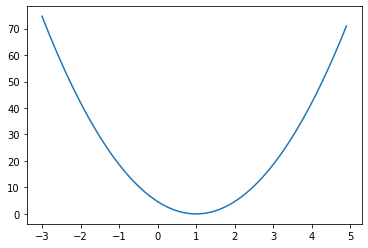

In [5]:
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

W_val = []
cost_val = []

sess = tf.Session()
# init global variables
sess.run(tf.global_variables_initializer())

for i in range(-30, 50):
  feed_W = i * 0.1
  curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
  W_val.append(curr_W)
  cost_val.append(curr_cost)

# show the cost function
plt.plot(W_val, cost_val)
plt.show()

In [6]:
X = [1, 2, 3]
Y = [1, 2, 3]

# set wrong modal weights
#W = tf.Variable(5.0)
W = tf.Variable(-5.0)

# linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# minimize : Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# launch the graph in a session
sess = tf.Session()
# init global variables
sess.run(tf.global_variables_initializer())

for step in range(50):
  print(step, sess.run(W))
  sess.run(train)

0 -5.0
1 0.6000001
2 0.97333336
3 0.99822223
4 0.9998815
5 0.9999921
6 0.99999946
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
